In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(dplyr)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [26]:
%%R
df=read.csv("/content/IPL_ball_by_ball_updated till 2024 (1).csv")
head(df)


  Match.id       Date  Season          Batting.team                Bowling.team
1   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
2   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
3   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
4   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
5   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
6   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
  Innings.No Ball.No  Bowler     Striker Non.Striker runs_scored extras
1          1     0.1 P Kumar  SC Ganguly BB McCullum           0      1
2          1     0.2 P Kumar BB McCullum  SC Ganguly           0      0
3          1     0.2 P Kumar BB McCullum  SC Ganguly           0      1
4          1     0.3 P Kumar BB McCullum  SC Ganguly           0      0
5          1     0.4 P Kumar BB McCullum  SC Ganguly           0      0
6       

In [27]:
%%R
tail(df)
#names(df)

       Match.id       Date Season Batting.team        Bowling.team Innings.No
255754  1426287 01-05-2024   2024 Punjab Kings Chennai Super Kings          2
255755  1426287 01-05-2024   2024 Punjab Kings Chennai Super Kings          2
255756  1426287 01-05-2024   2024 Punjab Kings Chennai Super Kings          2
255757  1426287 01-05-2024   2024 Punjab Kings Chennai Super Kings          2
255758  1426287 01-05-2024   2024 Punjab Kings Chennai Super Kings          2
255759  1426287 01-05-2024   2024 Punjab Kings Chennai Super Kings          2
       Ball.No     Bowler        Striker    Non.Striker runs_scored extras
255754    17.0 RJ Gleeson      SM Curran Shashank Singh           0      1
255755    17.1 RJ Gleeson      SM Curran Shashank Singh           0      0
255756    17.2 RJ Gleeson      SM Curran Shashank Singh           4      0
255757    17.3 RJ Gleeson      SM Curran Shashank Singh           0      0
255758    17.4 RJ Gleeson      SM Curran Shashank Singh           0      1
2557

# Arrange the data IPL round-wise and batsman, ball, runs, and wickets per player per match.

In [18]:
%%R
#arrange roundwise
df_roundwise=df %>%
  arrange(Season,`Match.id`)  # Assuming 'Season' and 'Match.id' identify rounds
head(df)

  Match.id       Date  Season          Batting.team                Bowling.team
1   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
2   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
3   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
4   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
5   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
6   335982 18-04-2008 2007/08 Kolkata Knight Riders Royal Challengers Bangalore
  Innings.No Ball.No  Bowler     Striker Non.Striker runs_scored extras
1          1     0.1 P Kumar  SC Ganguly BB McCullum           0      1
2          1     0.2 P Kumar BB McCullum  SC Ganguly           0      0
3          1     0.2 P Kumar BB McCullum  SC Ganguly           0      1
4          1     0.3 P Kumar BB McCullum  SC Ganguly           0      0
5          1     0.4 P Kumar BB McCullum  SC Ganguly           0      0
6       

In [18]:
%%R
#Arrange the data for each batsman
batsman_data=df%>%
  group_by(Match.id, Date,Striker) %>%
  summarise(
    Total_Balls_Faced =n(), #sum all balls faced in each group
    Total_Runs_Scored=sum(runs_scored),
    .groups='drop' #drop the group_by
  )
str(batsman_data)

tibble [16,149 × 5] (S3: tbl_df/tbl/data.frame)
 $ Match.id         : int [1:16149] 335982 335982 335982 335982 335982 335982 335982 335982 335982 335982 ...
 $ Date             : chr [1:16149] "18-04-2008" "18-04-2008" "18-04-2008" "18-04-2008" ...
 $ Striker          : chr [1:16149] "AA Noffke" "B Akhil" "BB McCullum" "CL White" ...
 $ Total_Balls_Faced: int [1:16149] 12 2 77 10 12 7 11 3 17 3 ...
 $ Total_Runs_Scored: int [1:16149] 9 0 158 6 12 8 7 5 18 2 ...


In [19]:
%%R
#arrange the data for each bowler
bowler_data=df%>%
  filter(wicket_confirmation==1) %>%
  group_by(Match.id, Date,Bowler) %>%
  summarise(
    Total_Wickets_Taken=n(),
    .groups='drop'
  )
str(bowler_data)

tibble [7,612 × 4] (S3: tbl_df/tbl/data.frame)
 $ Match.id           : int [1:7612] 335982 335982 335982 335982 335982 335982 335982 335982 335983 335983 ...
 $ Date               : chr [1:7612] "18-04-2008" "18-04-2008" "18-04-2008" "18-04-2008" ...
 $ Bowler             : chr [1:7612] "AA Noffke" "AB Agarkar" "AB Dinda" "I Sharma" ...
 $ Total_Wickets_Taken: int [1:7612] 1 3 2 1 1 1 3 1 1 2 ...


# Indicate the top three run-getters and top three wicket-takers in each IPL round.

In [23]:
%%R
# Identify top three run-getters in each IPL season
top_run_getters = df %>%
  group_by(Season, Striker) %>%  # Group by season and player
  summarise(Total_Runs = sum(runs_scored)) %>%  # Calculate total runs scored by each player in each season
  arrange(Season, desc(Total_Runs)) %>%  # Sort by season and descending total runs
  group_by(Season) %>%  # Regroup by season to find top 3 in each season
  slice_head(n = 3) %>%  # Select top 3 players in each season
  ungroup()  # Remove grouping variables

# Print the top three run-getters for each season
print("Top Three Run Getters in Each IPL Season:")
print(top_run_getters)

`summarise()` has grouped output by 'Season'. You can override using the
`.groups` argument.
[1] "Top Three Run Getters in Each IPL Season:"
# A tibble: 51 × 3
   Season  Striker        Total_Runs
   <chr>   <chr>               <int>
 1 2007/08 SE Marsh              616
 2 2007/08 G Gambhir             534
 3 2007/08 ST Jayasuriya         514
 4 2009    ML Hayden             572
 5 2009    AC Gilchrist          495
 6 2009    AB de Villiers        465
 7 2009/10 SR Tendulkar          618
 8 2009/10 JH Kallis             572
 9 2009/10 SK Raina              528
10 2011    CH Gayle              608
# ℹ 41 more rows
# ℹ Use `print(n = ...)` to see more rows


In [24]:
%%R
# Identify top 3 wicket-takers in each IPL season
top_wicket_takers= df %>%
  filter(wicket_confirmation == 1) %>%  # Filter only confirmed wickets
  group_by(Season, Bowler) %>%  # Group by season and bowler
  summarise(Total_Wickets_Taken = n()) %>%  # Count the number of wickets taken by each bowler in each season
  arrange(Season, desc(Total_Wickets_Taken)) %>%  # Sort by season and descending total wickets taken
  group_by(Season) %>%  # Regroup by season to find top 3 in each season
  slice_head(n = 3) %>%  # Select top 3 bowlers in each season
  ungroup()  # Remove grouping variables

# Print the top 3 wicket-takers for each season
print("Top Three Wicket Takers in Each IPL Season:")
print(top_wicket_takers)

`summarise()` has grouped output by 'Season'. You can override using the
`.groups` argument.
[1] "Top Three Wicket Takers in Each IPL Season:"
# A tibble: 51 × 3
   Season  Bowler          Total_Wickets_Taken
   <chr>   <chr>                         <int>
 1 2007/08 Sohail Tanvir                    24
 2 2007/08 IK Pathan                        20
 3 2007/08 JA Morkel                        20
 4 2009    RP Singh                         26
 5 2009    A Kumble                         22
 6 2009    A Nehra                          22
 7 2009/10 PP Ojha                          22
 8 2009/10 A Mishra                         20
 9 2009/10 Harbhajan Singh                  20
10 2011    SL Malinga                       30
# ℹ 41 more rows
# ℹ Use `print(n = ...)` to see more rows


#Fitting the most appropriate distribution for runs scored and wickets taken by the top three batsmen and bowlers in the last three IPL tournaments.

In [32]:
%%R
install.packages("MASS")
library(MASS)
# Fit distributions for runs scored by top batsmen
#normal distribution fitting
runs_data= top_run_getters %>%
  filter(Striker %in% top_run_getters) %>%
  select(Total_Runs)

# Fit normal distribution
runs_fit= fitdistr(runs_data$Runs, "normal")

# Print parameters of the fitted distribution
print("Parameters of Normal Distribution for Runs Scored:")
print(runs_fit$estimate)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpwOBTjE/downloaded_packages’





Error in select(., Total_Runs) : unused argument (Total_Runs)


In [33]:
%%R
# Filter data for top wicket-takers
wickets_data <- top_wicket_takers %>%
  select(Player, Total_Wickets_Taken)

# Fit Poisson distribution
wickets_fit <- fitdistr(wickets_data$Total_Wickets_Taken, "poisson")

# Print parameters of the fitted distribution
cat("\nParameters of Poisson Distribution for Wickets Taken:\n")
print(wickets_fit$estimate)

  unused arguments (Player, Total_Wickets_Taken)




Error in select(., Player, Total_Wickets_Taken) : 
  unused arguments (Player, Total_Wickets_Taken)


(as ‘lib’ is unspecified)














	‘/tmp/RtmpwOBTjE/downloaded_packages’



Shapiro-Wilk Normality Test:

	Shapiro-Wilk normality test

data:  kl_rahul_striker_runs$runs_scored
W = 0.72957, p-value < 2.2e-16


Skewness: 1.564706 
Kurtosis: 1.558586 

Parameters of Normal Distribution for KL Rahul's Runs as Striker:
    mean       sd 
1.315789 1.631166 

Kolmogorov-Smirnov Test for Normality:

	Asymptotic one-sample Kolmogorov-Smirnov test

data:  kl_rahul_striker_runs$runs_scored
D = 0.34207, p-value < 2.2e-16
alternative hypothesis: two-sided



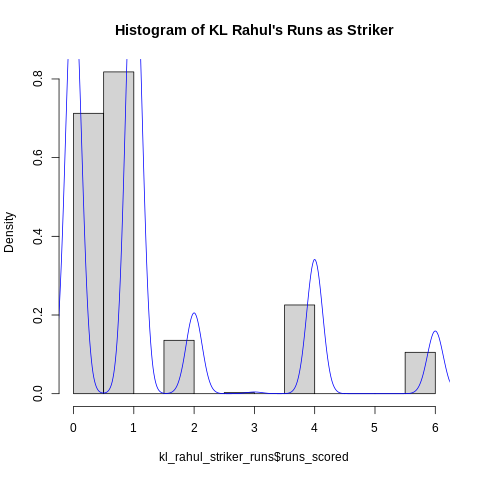

In [34]:
%%R
install.packages("e1071")
library(dplyr)
library(MASS)   # For fitdistr function
library(e1071)  # For skewness and kurtosis functions

# Filter data for runs scored by KL Rahul as striker
kl_rahul_striker_runs=df%>%
  filter(Striker == "KL Rahul")

# Data visualization (optional)
hist(kl_rahul_striker_runs$runs_scored, breaks = 10, freq = FALSE, main = "Histogram of KL Rahul's Runs as Striker")
lines(density(kl_rahul_striker_runs$runs_scored), col = "blue")

# Normality test
shapiro_test <- shapiro.test(kl_rahul_striker_runs$runs_scored)
cat("Shapiro-Wilk Normality Test:\n")
print(shapiro_test)

# Calculate skewness and kurtosis
skew <- skewness(kl_rahul_striker_runs$runs_scored)
kurt <- kurtosis(kl_rahul_striker_runs$runs_scored)
cat("\nSkewness:", skew, "\n")
cat("Kurtosis:", kurt, "\n")

# Fit normal distribution
params <- fitdistr(kl_rahul_striker_runs$runs_scored, "normal")

# Print parameters of the fitted distribution
cat("\nParameters of Normal Distribution for KL Rahul's Runs as Striker:\n")
print(params$estimate)

# Goodness-of-fit test (e.g., Kolmogorov-Smirnov test)
ks_test <- ks.test(kl_rahul_striker_runs$runs_scored, "pnorm", mean=params$estimate[1], sd=params$estimate[2])
cat("\nKolmogorov-Smirnov Test for Normality:\n")
print(ks_test)


In [35]:
%%R
library(readxl)
salary=read_excel("/content/IPL SALARIES 2024 (1).xlsx")
head(salary)

# A tibble: 6 × 5
  Player         Salary        Rs international iconic
  <chr>          <chr>      <dbl>         <dbl> <lgl> 
1 Abhishek Porel 20 lakh       20             0 NA    
2 Anrich Nortje  6.5 crore    650             1 NA    
3 Axar Patel     9 crore      900             0 NA    
4 David Warner   6.25 crore   625             1 NA    
5 Ishant Sharma  50 lakh       50             0 NA    
6 Kuldeep Yadav  2 crore      200             0 NA    


In [36]:
%%R
install.packages("stringdist")
install.packages("lubridate")
library(dplyr)
library(stringdist)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwOBTjE/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwOBTjE/downloaded_packages’



In [37]:
%%R
df <- df %>%
  mutate(year = lubridate::year(Date))
# Compute total runs scored each year by each striker
total_run_each_year <- df %>%
  group_by(year, Striker) %>%
  summarise(total_runs = sum(runs_scored), .groups = 'drop')

In [38]:
%%R
R2024= total_run_each_year %>%
  filter(year == 2024)


# Find the relationship between a player’s performance and the salary he gets in your data.

In [47]:
%%R
ipl_salary=salary %>%
  mutate(Matched_Player = sapply(Player, function(x) match_names(x, total_run_each_year$Striker)))

# Filter out rows where Matched_Player is NA (no match found)
ipl_salary=salary[!is.na(salary$Matched_Player), ]

# Merge the DataFrames on matched player names
df_merged=merge(salary, total_run_each_year, by.x = "Matched_Player", by.y = "Striker")

# Calculate the correlation between Salary and Runs
correlation= cor(df_merged$Rs, df_merged$runs_scored, use = "complete.obs")

# Print the correlation
print(paste("Correlation between Salary and Runs:", correlation))

Error in `salary[!is.na(salary$Matched_Player), ]`:
! Can't subset rows with `!is.na(salary$Matched_Player)`.
✖ Logical subscript `!is.na(salary$Matched_Player)` must be size 1 or 166, not 0.
Run `rlang::last_trace()` to see where the error occurred.



Error in salary[!is.na(salary$Matched_Player), ] : 
✖ Logical subscript `!is.na(salary$Matched_Player)` must be size 1 or 166, not 0.
